In [1]:
import maboss
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('seaborn-v0_8-whitegrid')
import sys
import os
import tempfile
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import param_customing

In [2]:
bnd_file = r".\RELN_NOTCH_LEC_clean.bnd"

## Non-parameterized SIMULATION at 50% ACTIVITY 

In [3]:
cfg_file = r".\Non_parameterized\non_parameterized_parameters_50.bnd.cfg"

In [4]:
internal_nodes = [
    "CPX4232", "MAML", "NOTCH", "FYN", "SHUTTLEc", "SHUTTLEn", "NICDc", "GAMMA", "RELNR",
    "NICD_DAB2n", "FBXW7_SKP1_CUL1_RBX1", "RBPJ_NCOR", "RBPJ_SNW1", "RELN_RELNR_DAB2",
    "RELN_RELNR_DAB2p_SH3KBP1", "TARGET", "RELN_RELNR_DAB2_SH3KBP1", "CPX2176", "RELN_RELNR",
    "NICDpUb", "CDK8_CCNC", "NEXTt", "ADAM", "NICD_DAB2c", "NICDp_FBXW7_SKP1_CUL1_RBX1",
    "NOTCHcoactivator_CDK8_CCNC", "ADPc", "PROTEASOME", "NICD_RBPJ_SNW1", "NOTCHLUb_NOTCH",
    "TBL1_HDAC3_NCOR", "ADAM_ZN2", "CREBBP", "E3UbLIGASE", "DAB2cp", "EP300", "CPX4233",
    "NICDn", "NOTCHLUb_NOTCHt", "DAB2np", "NOTCHcoactivator", "NOTCHL", "NOTCHL_NOTCH",
    "NICD_SHUTTLE", "CPX4231", "ADPn", "NICDp", "NEXT", "KAT2B"
]

In [6]:
model = maboss.load(bnd_file, cfg_file)

for name in internal_nodes:
    model.network[name].is_internal = True
    
outputs = ['NICDc', 'NICDn', 'PROTEASOME', 'DAB2', 'DAB2cp']
model.network.set_output(outputs)

DAB2
NICDc
PROTEASOME
DAB2cp
NICDn


<Figure size 1000x600 with 0 Axes>

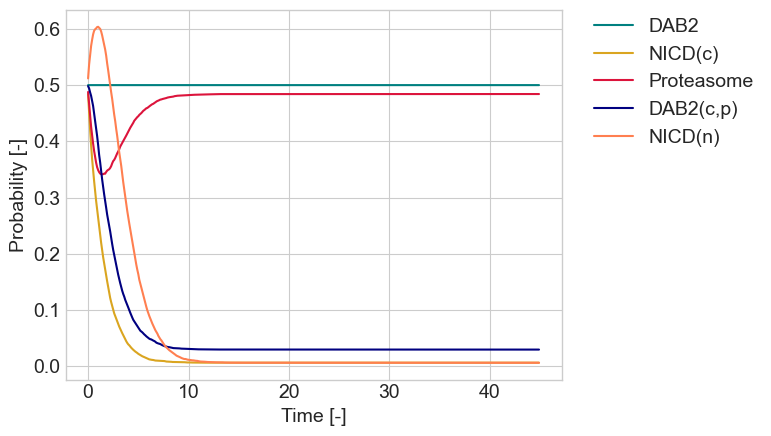

In [7]:
result = model.run()

plt.figure(figsize=(10, 6))
result.plot_node_trajectory()

ax = plt.gca()
for line in ax.get_lines():
    line.set_linewidth(1.5) 

colors = ["teal", "goldenrod", "crimson", "navy", "coral"]

for line, color in zip(ax.get_lines(), colors):
     line.set_color(color)
     print(line.get_label())
    
plt.xlabel("Time [-]", fontsize=14)
plt.ylabel("Probability [-]", fontsize=14)
custom_labels = ['DAB2', 'NICD(c)', 'Proteasome', 'DAB2(c,p)', 'NICD(n)'] 

plt.legend(custom_labels, loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=14, borderaxespad=0.)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(r".\MaBoSS_figures\non_parameterized_50.png", dpi=600, bbox_inches='tight')
plt.show()
